<a href="https://colab.research.google.com/github/bisht-ruchir-007/LoanPredictor/blob/master/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN PREDICTION PROJECT 2020 

 IMPORT ALL THE REQUIRED LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#  LOADING THE DATASET 

In [0]:
train = pd.read_csv('./sample_data/LoanTrainFile.csv')
test = pd.read_csv('./sample_data/LoanTestFile.csv')

df = [train, test]

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Following Heatmap shows the number of null values present in the each feature of the train dataset. 

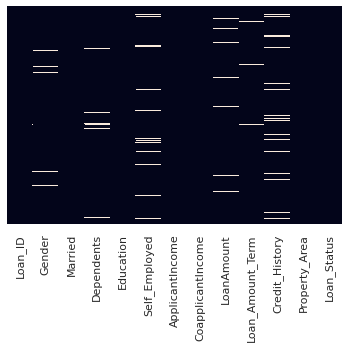

In [0]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)

# FEATURE ENGINEERING

In [0]:
# Target variable/label 
# Loan_Status

# print the values in the Loan_status
print(train["Loan_Status"].head(5))

# Mapping the 'Y' to 1 and 'N' to 0 
train['Loan_Status'] = train.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

print("\nAfter mapping : ");
print(train["Loan_Status"].head(5))

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

After mapping : 
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


Now lets check all the input features . Loan ID would be the part of the prediction therefore moving on to the Gender feature

## 1.Gender Feature 

In [0]:
# Gender Feature

print("Total number of males and females are : ")
train["Gender"].value_counts()

Total number of males and females are : 


Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
print("Total null entries (in Train Dataset) : ",train["Gender"].isnull().sum())
print("Total null entries (in Test  Dataset) : ",test["Gender"].isnull().sum())

Total null entries (in Train Dataset) :  13
Total null entries (in Test  Dataset) :  11


In [0]:
train[['Gender', 'Loan_Status']].groupby('Gender', as_index=False).mean()

,Gender,Loan_Status
0,Female,0.669643
1,Male,0.693252


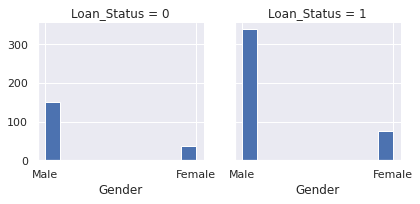

In [0]:
grid = sns.FacetGrid(train, col='Loan_Status')
grid.map(plt.hist, 'Gender')

Here mode of our gender feature is 'Male', So I decided to fill the null entires with male in Gender Feature.

In [0]:
for d in df:
    d["Gender"].fillna('Male', inplace=True)

In [0]:
print("Null values in Gender Features : ",train["Gender"].isnull().sum())

Null values in Gender Features :  0


In [0]:
# mapping the 'Male' to 0 and 'Female' to 1

for d in df:
  d['Gender'] = d['Gender'].map({'Male':0, 'Female':1}).astype(int)

## 2.Married Feature

In [0]:
# Married Feature

train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
print("total null values : ",train["Married"].isnull().sum())

total null values :  3


placing the mode values in the null fields

In [0]:
for d in df:
    d['Married'] = d['Married'].fillna(d['Married'].mode()[0])

In [0]:
train[['Married', 'Loan_Status']].groupby('Married', as_index=False).mean()

,Married,Loan_Status
0,No,0.629108
1,Yes,0.718204


After studying the below plot one can easily say that probability of getting a loan is more if the person is "MARRIED".

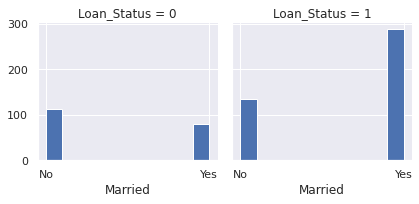

In [0]:
grid = sns.FacetGrid(train, col='Loan_Status')
grid.map(plt.hist, 'Married') 

##3.Based on Education , Gender and Marrital Status 

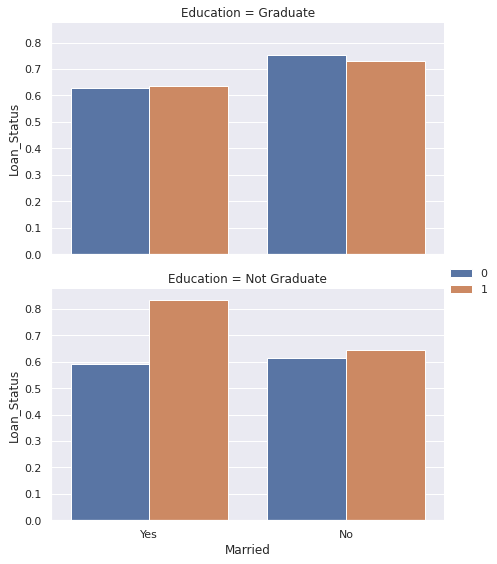

In [0]:
grid = sns.FacetGrid(train, row='Education', size=4, aspect=1.6)
grid.map(sns.barplot, 'Married', 'Loan_Status', 'Gender', ci=None, palette='deep')
grid.add_legend()

Blue is for "Male" And Brown is for "Female".

I) IF EDUCATED :Loan status is nearly same based on Gender and Marrital Status.     

II)IF UN-EDUCATED : Loan Status for  non-graduated married female is higher than male.


In [0]:
# mapping Married Features to numerial values 
# that is 'Yes': 1 and 'No':0

for d in df:
    d['Married'] = d['Married'].map({'Yes': 1, 'No': 0}).astype(int)


## 4.Dependents Feature

In [0]:
# Dependents feature
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
print("Total null values in Dependents column : ",train['Dependents'].isnull().sum())

Total null values in Dependents column :  15


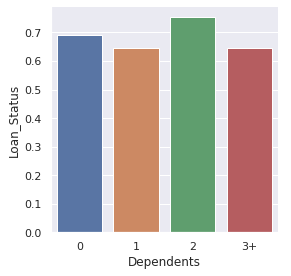

In [0]:
grid = sns.FacetGrid(train,size=4)
grid.map(sns.barplot, 'Dependents', 'Loan_Status', palette='deep', ci=None)
grid.add_legend()

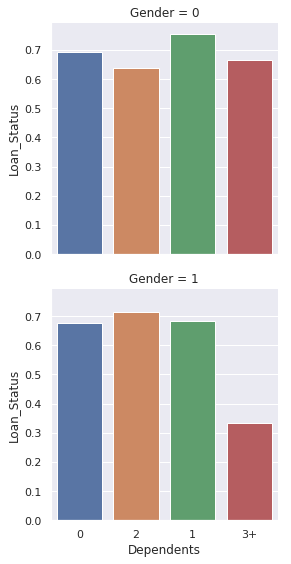

In [0]:
grid = sns.FacetGrid(train, row='Gender',size=4)
grid.map(sns.barplot, 'Dependents', 'Loan_Status', palette='deep', ci=None)
grid.add_legend()

As such there is no pattern But one thing to be noted is that changes of getting the Loan suddenly falls if a Female has >= 3 dependents .  

In [0]:
for d in df:
    d['Dependents'] = d['Dependents'].fillna(train.Dependents.mode()[0])
    d['Dependents'] = d['Dependents'].replace('3+', '3')
    d['Dependents'] = d.Dependents.astype(int)

## 5.Education Feature

In [0]:
# Education Features
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
# loan status based on education
train[['Education', 'Loan_Status']].groupby('Education', as_index=False).mean()

,Education,Loan_Status
0,Graduate,0.708333
1,Not Graduate,0.611940


In [0]:
print("null values in train and test dataset : ",train.Education.isnull().sum(),test.Education.isnull().sum())

null values in train and test dataset :  0 0


In [0]:
# mapping 'Graduate':1 and 'Not Graduate':0
for d in df:
    d['Education'] = d['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype(int)

## 6.Self_Employed Feature

In [0]:
# Self_Employed
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
print("null values in train and test dataset : ",train.Self_Employed.isnull().sum(),test.Self_Employed.isnull().sum())

null values in train and test dataset :  32 23


In [0]:
train[['Self_Employed', 'Loan_Status']].groupby('Self_Employed', as_index=False).mean()

,Self_Employed,Loan_Status
0,No,0.686000
1,Yes,0.682927


In [0]:
# mapping the values in self employed
for dataset in df:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])
    dataset['Self_Employed'] = dataset['Self_Employed'].map({'No': 0, 'Yes': 1}).astype(int)

## 7.Credit_History Feature

In [0]:
# Credit_History
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
print("null values in train dataset : ",train.Credit_History.isnull().sum())

null values in train dataset :  50


Plot Based on **Credit_Histroy vs Marital Status** and GroupedBy Gender

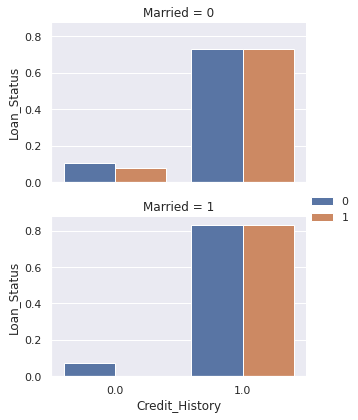

In [0]:
grid = sns.FacetGrid(train, row='Married', aspect=1.5)
grid.map(sns.barplot, 'Credit_History', 'Loan_Status', 'Gender', palette='deep', ci=None)
grid.add_legend()

Plot Based on **Credit_Histroy vs Education** and GroupedBy Gender

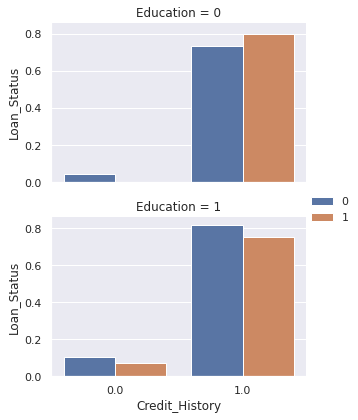

In [0]:
grid = sns.FacetGrid(train, row='Education', aspect=1.5)
grid.map(sns.barplot, 'Credit_History', 'Loan_Status', 'Gender', palette='deep', ci=None)
grid.add_legend()

Plot Based on **Credit_Histroy vs Self-Employed** and GroupedBy Gender

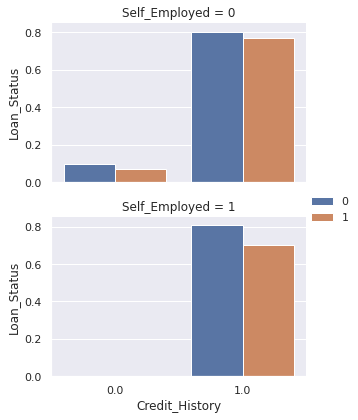

In [0]:
grid = sns.FacetGrid(train, row='Self_Employed', aspect=1.5)
grid.map(sns.barplot, 'Credit_History', 'Loan_Status', 'Gender', palette='deep', ci=None)
grid.add_legend()

**Overall if any person has credit history then his or her chances are higher to get a loan.**

In [0]:
for d in df:
    d['Credit_History'] = d['Credit_History'].fillna(d['Credit_History'].mode()[0]).astype(int)

7.Property_Area Feature

In [0]:
# Property_Area
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
print("null values : ",train['Property_Area'].isnull().sum())

null values :  0


In [0]:
train[['Property_Area', 'Loan_Status']].groupby('Property_Area', as_index=False).mean()

,Property_Area,Loan_Status
0,Rural,0.614525
1,Semiurban,0.768240
2,Urban,0.658416


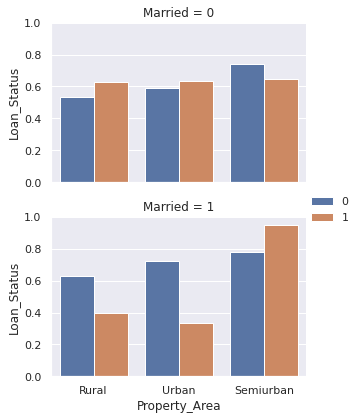

In [0]:
grid = sns.FacetGrid(train, row='Married', aspect=1.5)
grid.map(sns.barplot, 'Property_Area', 'Loan_Status', 'Gender', palette='deep', ci=None)
grid.add_legend()

if any person has property_area as  semiurban area then that person has higher chances to get a loan.

In [0]:
for dataset in df:
    dataset['Property_Area'] = dataset['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2}).astype(int)

In [0]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1,1,1
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1,1,1
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0,2,0
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1,1,1
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1,2,0


## **ApplicantIncome**

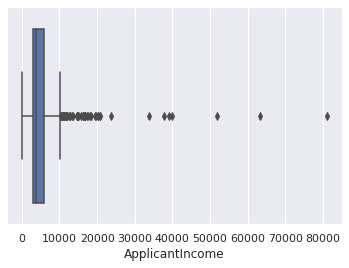

In [0]:
sns.set(style='darkgrid')
sns.boxplot(train['ApplicantIncome'])

## **CoapplicantIncome**

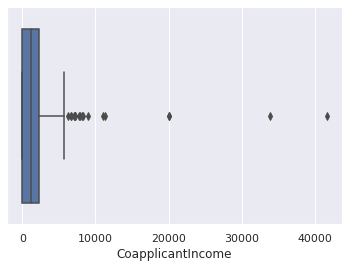

In [0]:
sns.set(style='darkgrid')
sns.boxplot(train.CoapplicantIncome)

## **LoanAmount**

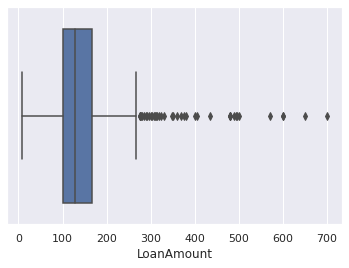

In [0]:
sns.set(style='darkgrid')
sns.boxplot(train.LoanAmount)

## **Loan Amount Term**

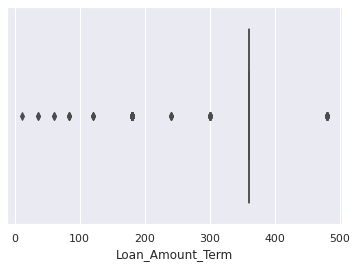

In [0]:
sns.set(style='darkgrid')
sns.boxplot(train.Loan_Amount_Term)

In [0]:
train['ApplicantIncome'] = train['ApplicantIncome'].astype(int)
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype(int)


In [0]:
train['ApplicantIncomeBand'] = pd.cut(train['ApplicantIncome'], 4)
train[['ApplicantIncomeBand', 'Loan_Status']].groupby('ApplicantIncomeBand', as_index=False).mean().sort_values(by='ApplicantIncomeBand', ascending=True)

,ApplicantIncomeBand,Loan_Status
0,"(69.15, 20362.5]",0.687086
1,"(20362.5, 40575.0]",0.714286
2,"(40575.0, 60787.5]",1.000000
3,"(60787.5, 81000.0]",0.500000


In [0]:
train['CoapplicantIncomeBand'] = pd.cut(train['CoapplicantIncome'], 3)
train[['CoapplicantIncomeBand', 'Loan_Status']].groupby('CoapplicantIncomeBand', as_index=False).mean().sort_values(by='CoapplicantIncomeBand', ascending=True)

,CoapplicantIncomeBand,Loan_Status
0,"(-41.667, 13889.0]",0.690164
1,"(13889.0, 27778.0]",0.500000
2,"(27778.0, 41667.0]",0.000000


In [0]:
for dataset in df:
    dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
for dataset in df:
    dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())

In [0]:
train['Loan_Amount_TermBand'] = pd.cut(train['Loan_Amount_Term'], 3)
train[['Loan_Amount_TermBand', 'Loan_Status']].groupby('Loan_Amount_TermBand', as_index=False).mean().sort_values(by='Loan_Amount_TermBand', ascending=True)

,Loan_Amount_TermBand,Loan_Status
0,"(11.532, 168.0]",0.750000
1,"(168.0, 324.0]",0.655738
2,"(324.0, 480.0]",0.689464


In [0]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeBand,CoapplicantIncomeBand,Loan_Amount_TermBand
0,LP001002,0,0,0,1,0,5849,0,146.412162,360.0,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
1,LP001003,0,1,1,1,0,4583,1508,128.000000,360.0,1,0,0,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
2,LP001005,0,1,0,1,1,3000,0,66.000000,360.0,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
3,LP001006,0,1,0,0,0,2583,2358,120.000000,360.0,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
4,LP001008,0,0,0,1,0,6000,0,141.000000,360.0,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"


In [0]:
for dataset in df:
    dataset.loc[dataset['ApplicantIncome'] <= 20362.5, 'ApplicantIncome'] = 0
    dataset.loc[(dataset['ApplicantIncome'] > 20362.5) & (dataset['ApplicantIncome'] <= 40575.0), 'ApplicantIncome'] = 1
    dataset.loc[(dataset['ApplicantIncome'] > 40575.0) & (dataset['ApplicantIncome'] <= 60787.5), 'ApplicantIncome'] = 2
    dataset.loc[(dataset['ApplicantIncome'] > 60787.5), 'ApplicantIncome'] = 3

In [0]:
for dataset in df:
    dataset.loc[dataset['CoapplicantIncome'] <= 13889.0, 'CoapplicantIncome'] = 0
    dataset.loc[(dataset['CoapplicantIncome'] > 13889.0) & (dataset['CoapplicantIncome'] <= 27778.0), 'CoapplicantIncome'] = 1
    dataset.loc[(dataset['CoapplicantIncome'] > 27778.0), 'CoapplicantIncome'] = 2

In [0]:
for dataset in df:
    dataset.loc[dataset['LoanAmount'] <= 181.75, 'LoanAmount'] = 0
    dataset.loc[(dataset['LoanAmount'] > 181.75) & (dataset['LoanAmount'] <= 354.5), 'LoanAmount'] = 1
    dataset.loc[(dataset['LoanAmount'] > 354.5) & (dataset['LoanAmount'] <= 527.25), 'LoanAmount'] = 2
    dataset.loc[(dataset['LoanAmount'] > 527.25), 'LoanAmount'] = 3
    dataset['LoanAmount'] = dataset['LoanAmount'].astype(int)

In [0]:
for dataset in df:
    dataset.loc[dataset['Loan_Amount_Term'] <= 168.0, 'Loan_Amount_Term'] = 0
    dataset.loc[(dataset['Loan_Amount_Term'] > 168.0) & (dataset['Loan_Amount_Term'] <= 324.0), 'Loan_Amount_Term'] = 1
    dataset.loc[(dataset['Loan_Amount_Term'] > 324.0), 'Loan_Amount_Term'] = 2
    dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].astype(int)

In [0]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeBand,CoapplicantIncomeBand,Loan_Amount_TermBand
0,LP001002,0,0,0,1,0,0,0,0,2,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
1,LP001003,0,1,1,1,0,0,0,0,2,1,0,0,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
2,LP001005,0,1,0,1,1,0,0,0,2,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
3,LP001006,0,1,0,0,0,0,0,0,2,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"
4,LP001008,0,0,0,1,0,0,0,0,2,1,1,1,"(69.15, 20362.5]","(-41.667, 13889.0]","(324.0, 480.0]"


In [0]:
train.drop('ApplicantIncomeBand', inplace=True, axis=1)
train.drop('CoapplicantIncomeBand', inplace=True, axis=1)
train.drop('Loan_Amount_TermBand', inplace=True, axis=1)

In [0]:
for dataset in df:
    dataset.drop('Loan_ID', axis=1, inplace=True)

In [0]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0,0,0,2,1,1,1
1,0,1,1,1,0,0,0,0,2,1,0,0
2,0,1,0,1,1,0,0,0,2,1,1,1
3,0,1,0,0,0,0,0,0,2,1,1,1
4,0,0,0,1,0,0,0,0,2,1,1,1


In [0]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

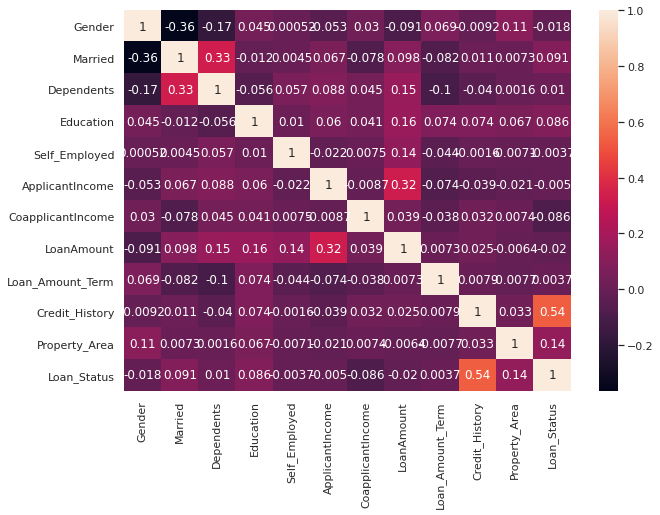

In [0]:
data_corr = pd.concat([X, y], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

# MODEL TRAINING 

## Logistic Regression

In [0]:
LogReg_classifier = LogisticRegression()
LogReg_classifier.fit(X,y)
LogReg_acc = cross_val_score(LogReg_classifier, X, y, cv=9, scoring='accuracy').mean()
print("Score : ",LogReg_acc*100)

Score :  81.10969025291274


## SVM Classifier

In [0]:
SVM_classifier = SVC()
SVM_classifier.fit(X,y)
SVM_acc = cross_val_score(SVM_classifier, X, y, cv=9, scoring='accuracy').mean()
print("Score : ",SVM_acc*100)

Score :  80.9462915601023


## KNN Classifier

In [0]:
Knn_classifier = KNeighborsClassifier()
Knn_classifier.fit(X,y)
Knn_acc = cross_val_score(Knn_classifier, X, y, cv=9, scoring='accuracy').mean()
print("Score : ",Knn_acc*100)

Score :  74.91238041110164


## Decision-Tree Classifier

In [0]:
DTree_classifier = DecisionTreeClassifier()
DTree_classifier.fit(X,y)
DTree_acc = cross_val_score(DTree_classifier, X, y, cv=9, scoring='accuracy').mean()
print("Score : ",DTree_acc*100)

Score :  73.44416027280478


## Random Forset Classifier

In [0]:
Ramdom_Forest_classifier = RandomForestClassifier(n_estimators=100)
Ramdom_Forest_classifier.fit(X, y)
Ramdom_Forest_acc = cross_val_score(Ramdom_Forest_classifier, X, y, cv=9, scoring='accuracy').mean()
print("Score : ",Ramdom_Forest_acc*100)

Score :  76.87316472482712


In [0]:
acc_dict = {'Logistic Regression': round(LogReg_acc, 2), 
           'Support Vector Classifier': round(SVM_acc, 2), 
           'K-Nearest Neighbor': round(Knn_acc, 2), 
           'Decision Tree': round(DTree_acc, 2), 
           'Random Forest': round(Ramdom_Forest_acc, 2),
           }


## Accuracy of the SVC and Logistic Regression are the best !!! 

In [0]:
for i in acc_dict:
  print(i," ",acc_dict[i]*100)

Logistic Regression   81.0
Support Vector Classifier   81.0
K-Nearest Neighbor   75.0
Decision Tree   73.0
Random Forest   77.0
